In [ ]:
'''
Muskan Pandey
Linear Regression and Locally Weighted Linear Regression
'''

In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
data = pd.read_csv('slr.csv')
print(data.shape)
print(data.columns)

(84, 2)
Index(['SAT', 'GPA'], dtype='object')


In [3]:
msk = np.random.rand(len(data)) < 0.8
train = data[msk]
test = data[~msk]

In [4]:
train.head()

,SAT,GPA
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
5,1670,2.91


In [5]:
print(len(train), len(test))

67 17


In [6]:
X_train = train['SAT']
Y_train = train['GPA']
X_test = test['SAT']
Y_test = test['GPA']

In [7]:
x_mean = sum(X_train)/len(X_train)
y_mean = sum(Y_train)/len(Y_train)
print(x_mean, y_mean)

1848.0298507462687 3.3402985074626868


In [8]:
t = 0.5

In [14]:
b1 = sum((X_train - x_mean)*(Y_train - y_mean)) / sum((X_train - x_mean)**2)
b0 = y_mean - b1*x_mean

In [32]:
weight = -(X_test - X_train)**2
weight = weight/(2*t**2)
weight.to_numpy(dtype ='float32')
weight = np.exp(weight)

In [23]:
h_theta = (b0 + b1*X_test)

In [24]:
h_theta.head()

5     3.020232
8     3.237846
9     3.341303
10    3.136174
20    3.182551
Name: SAT, dtype: float64

In [28]:
weight.head()

5     0.000000
8     0.000000
9     0.980747
10    0.000000
20    0.000000
Name: SAT, dtype: float64

In [49]:
Y_pred = b0 + b1*X_train

In [50]:
import matplotlib.pyplot as plt


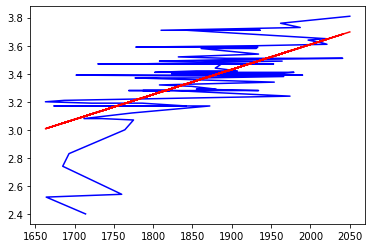

In [53]:
plt.plot(X_train, Y_train, color = "b")
plt.plot()
plt.plot(X_train, Y_pred, color="r")
plt.plot()
plt.show()

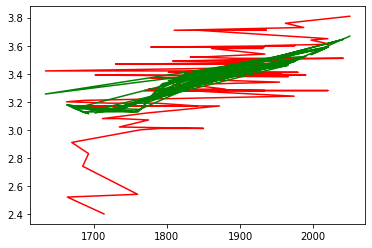

In [54]:
from math import ceil
from scipy import linalg


def lowess(x, y, f=2. / 3., iter=3):
    n = len(x)
    r = int(ceil(f * n))
    h = [np.sort(np.abs(x - x[i]))[r] for i in range(n)]
    w = np.clip(np.abs((x[:, None] - x[None, :]) / h), 0.0, 1.0)
    w = (1 - w ** 3) ** 3
    yest = np.zeros(n)
    delta = np.ones(n)
    for iteration in range(iter):
        for i in range(n):
            weights = delta * w[:, i]
            b = np.array([np.sum(weights * y), np.sum(weights * y * x)])
            A = np.array([[np.sum(weights), np.sum(weights * x)],
                          [np.sum(weights * x), np.sum(weights * x * x)]])
            beta = linalg.solve(A, b)
            yest[i] = beta[0] + beta[1] * x[i]

        residuals = y - yest
        s = np.median(np.abs(residuals))
        delta = np.clip(residuals / (6.0 * s), -1, 1)
        delta = (1 - delta ** 2) ** 2

    return yest

if __name__ == '__main__':
    x = data['SAT']
    y = data['GPA']

    f = 0.2
    yest = lowess(x, y, f=f, iter=5)

    plt.plot(x, y, color="r")
    plt.plot()
    plt.plot(x, yest, color="g")
    plt.plot()
    plt.show()